In [21]:
import numpy as np
np.random.seed(0)

In [22]:
from typing import Any
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [23]:
cmap_background = ListedColormap(
    colors=['#FFAAAA', '#AAAAFF', '#AAFFAA'
])

cmap_points = [
    'red',
    'blue',
    'green'
]

def make_meshgrid(
    x0: np.ndarray,
    x1: np.ndarray
) -> np.ndarray:
    step_width = 0.25
    offset = 0.1
    x0a = np.arange(np.min(x0) - offset, np.max(x0) + offset, step_width)
    x1a = np.arange(np.min(x1) - offset, np.max(x1) + offset, step_width)
    xx0, xx1 = np.meshgrid(x0a, x1a)
    return xx0, xx1

def plot_contours(
    ax: plt.Axes,
    clf: KNeighborsClassifier,
    xx0: np.ndarray,
    xx1: np.ndarray,
    **params: Any
):
    x_combinations = np.vstack([xx0.flatten(), xx1.flatten()]).T
    z = clf.predict(x_combinations)
    z = np.reshape(z, newshape=(xx0.shape))
    ax.contourf(xx0, xx1, z, **params)

def plot_decision_border(
    clf: KNeighborsClassifier,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
) -> None:
    fig, ax = plt.subplots()
    X0 = x_train[:, 0]
    X1 = x_train[:, 1]
    xx0, xx1 = make_meshgrid(X0, X1)
    plot_contours(
        ax, clf, xx0, xx1, cmap=cmap_background, alpha=0.5
    )
    for idx, point in enumerate(x_train):
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_points[y_train[idx]],
            s=15.0,
            marker="o"
        )
    for idx, point in enumerate(x_test):
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_points[y_test[idx]],
            s=40.0,
            marker="*"
        )
    plt.xlim([8.0, 22.0])
    plt.ylim([10.0, 30.0])
    plt.show()

In [24]:
dataset = load_breast_cancer()

x = dataset.data[:, [0, 1]]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[1-NN] train error: 1.0 test error: 0.8187134502923976


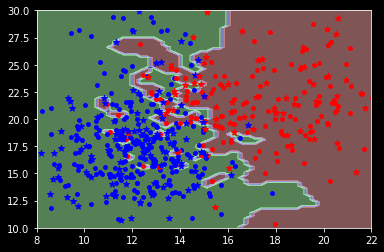

[3-NN] train error: 0.9321608040201005 test error: 0.8421052631578947


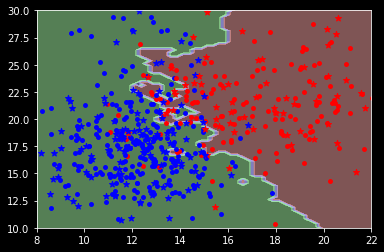

[5-NN] train error: 0.9246231155778895 test error: 0.8771929824561403


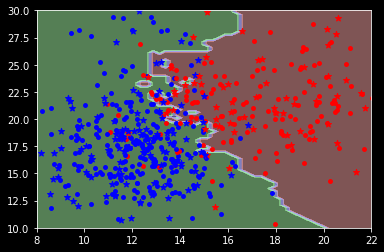

[7-NN] train error: 0.914572864321608 test error: 0.8888888888888888


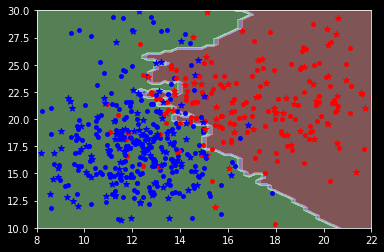

[9-NN] train error: 0.9020100502512562 test error: 0.9064327485380117


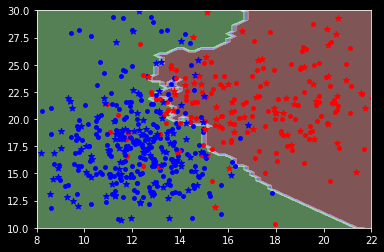

[19-NN] train error: 0.9045226130653267 test error: 0.9064327485380117


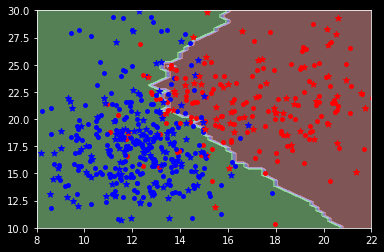

[29-NN] train error: 0.8944723618090452 test error: 0.9239766081871345


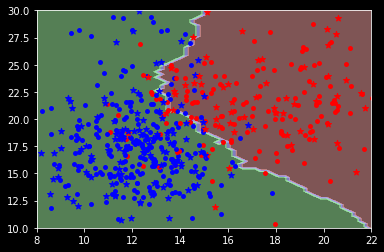

[49-NN] train error: 0.9020100502512562 test error: 0.9181286549707602


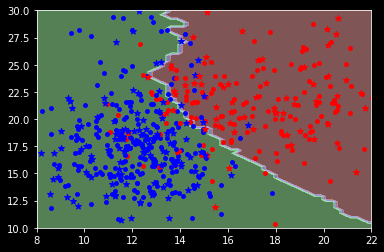

[99-NN] train error: 0.8819095477386935 test error: 0.9064327485380117


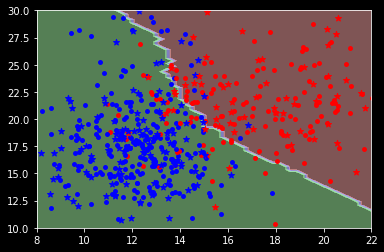

In [25]:
ks = [1, 3, 5, 7, 9, 19, 29, 49, 59, 79, 99]

for k in ks:
    clf = KNeighborsClassifier(k)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    print(f"[{k}-NN] train acc: {train_score} test acc: {test_score}")
    clf.fit(x_train, y_train)
    plot_decision_border(clf, x_train[:500], y_train[:500], x_test[:200], y_test[:200])